<a href="https://colab.research.google.com/github/doretox/llm-from-scratch/blob/main/ze_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Referência

Build a Large Language Model (from Scratch) - Sebastian Raschka

# Estágios para construção de uma LLM





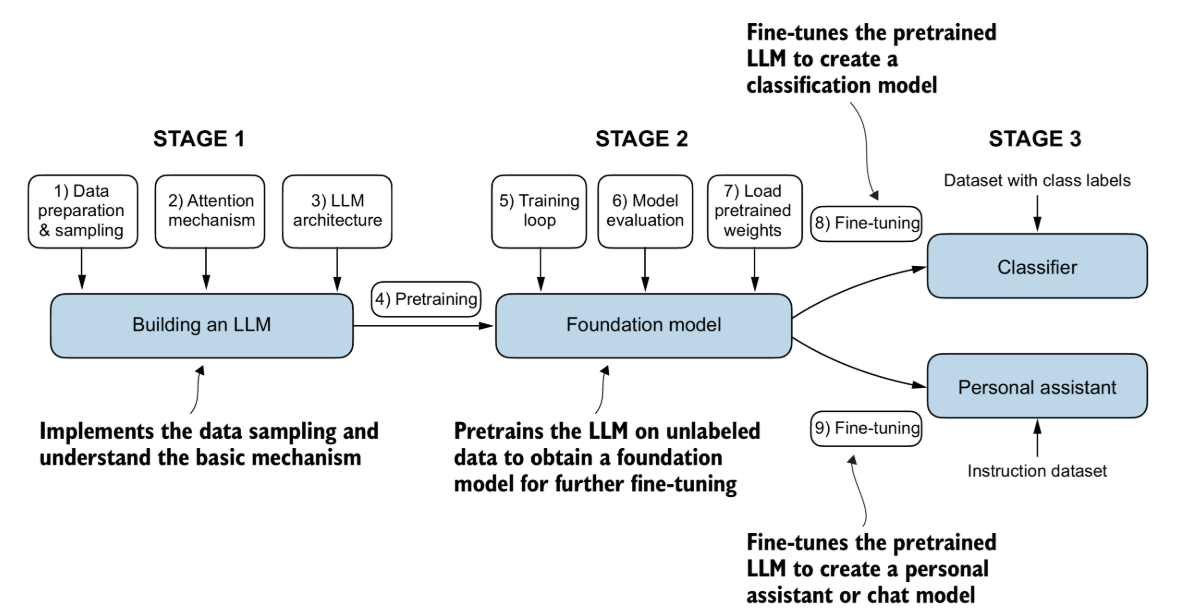

# Chapter 2 - Stage 1
## 1 - Data Preparation & Sampling

Important Notes

1) _embedding_: Converting data into a vector format.
2)


The text used to tokenization process in this chpater is called "The Verdict".

In [ ]:
# Download The Verdict Dataset
import urllib.request

url = ("https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/refs/heads/main/ch02/01_main-chapter-code/the-verdict.txt")
file_path = "the-verdict.txt"

urllib.request.urlretrieve(url, file_path)


# printing an exemple
with open("the-verdict.txt", "r") as f:
    raw_text = f.read()

print("Total number of character: ", len(raw_text))
print(raw_text[:99])

Total number of character:  20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [ ]:
# Rudimentary Tokenizer Using Regex

import re

preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [ ]:
# Listing 2.3 Implementing a simple text tokenizer
class SimpleTokenizerV1:
  def __init__(self, vocab):

    # Stores the vocabulary as a class attribute for access in the encode and decode methods.
    self.str_to_int = vocab

    # Creates an inverse vocabulary that maps token IDs back to the original text tokens.
    self.int_to_str = {i:s for s,i in vocab.items()}

  # Process input text into token IDs
  def encode(self, text):
    preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

    preprocessed = [
        item.strip() for item in preprocessed if item.strip()
    ]
    ids = [self.str_to_int[s] for s in preprocessed]
    return ids

  # Converts token IDs back into text
  def decode(self, ids):
      text = " ".join([self.int_to_str[i] for i in ids])
      # Replace spaces before the specified punctuations
      text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
      return text

In [ ]:
all_words = sorted(set(preprocessed))
vocab = {token:integer for integer,token in enumerate(all_words)}
tokenizer = SimpleTokenizerV1(vocab)

text = """"It's the last he painted, you know,"
           Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)


print(tokenizer.decode(ids))

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]
" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [ ]:
# O mesmo código abaixo dá erro pq a palavra HELLO não existe no training set.

all_words = sorted(set(preprocessed))
vocab = {token:integer for integer,token in enumerate(all_words)}
tokenizer = SimpleTokenizerV1(vocab)

text = "Hello, do you like tea?"
ids = tokenizer.encode(text)
print(ids)


print(tokenizer.decode(ids))

KeyError: 'Hello'